In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('iris.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
np.random.seed(1234)
X = df[df.columns[:-1]]
Y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

# Árbol de decisión

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [10]:
arbol = DecisionTreeClassifier()

In [11]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = arbol.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [15]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 12]], dtype=int64)

In [16]:
# Crear una lista de valores de clase
lista_clases = df['class'].unique()

In [17]:
lista_clases

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
#Crear gráfica de árbol
import graphviz
from sklearn.tree import export_graphviz

In [19]:
export_graphviz(arbol, out_file = 'Arbol.dot', feature_names = df.columns[:-1],
                class_names = lista_clases, filled = True)

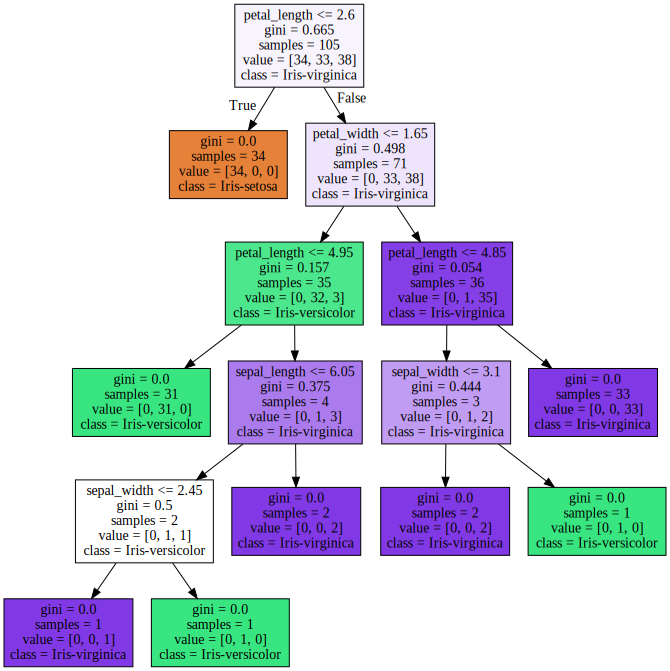

In [20]:
with open('Arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [21]:
import pydot

(graph,) = pydot.graph_from_dot_file('Arbol.dot')

graph.write_png('Arbol.png')

In [22]:
arbol.feature_importances_

array([0.00715649, 0.03339695, 0.56020346, 0.3992431 ])

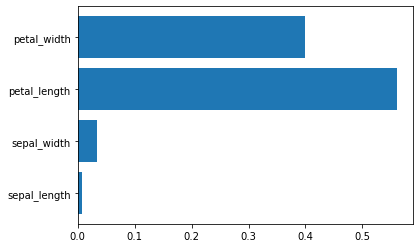

In [23]:
import matplotlib.pyplot as plt

plt.barh(range(len(df.columns[:-1])), arbol.feature_importances_)
plt.yticks(np.arange(len(df.columns[:-1])), df.columns[:-1])
plt.show()

In [24]:
%matplotlib inline

# Bosque Aleatorio

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
forest = RandomForestClassifier(random_state=1234, n_jobs = -1)

In [27]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=1234)

In [28]:
y_pred2 = forest.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred2)

0.9555555555555556

In [30]:
confusion_matrix(y_test, y_pred2)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 11]], dtype=int64)

In [31]:
forest.score(X_train,y_train)

1.0

# Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [33]:
df['class'] = df['class'].astype('category')
df['class_code'] = df['class'].cat.codes

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [35]:
Y = df['class_code']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [37]:
bag = BaggingClassifier(base_estimator=SVC())

In [38]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC())

In [39]:
y_pred3 = bag.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred3)

0.9333333333333333

In [41]:
confusion_matrix(y_test, y_pred3)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  3, 18]], dtype=int64)